# <center>Applied Programming Lab '24</center>
## <center>Assignment 7 - Sound Localisation</center>
### <center>Sanjeev Subrahmaniyan </center>
### <center>EE23B102</center>

This notebook contains the solution for the sound localisation assignment in full detail. The cells can be executed and the parameters tuned. For the notebook to run without any issues, ensure that the files rx2.txt and rx3.txt are both in the same directory as the notebook. The programs are written in parts with the appropriate explainations/comments along with them. All of the plots have the inferences typed out right under them. The answers to the questions are given in cells which begin with "Question". 

In [1]:
# Contains the libararies that are imported for the assignment
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def micPos(nmics, pitch):
    """
    Computes the coordinates of the mics.
    
    Parameters:
    int: nmics: The number of mics 
    float: pitch: The distance between mics in arbitrary units
    
    Returns:
    list: A list of tuples which contain the positions of the mics.
    """
    # Assumption that the center is (0,0) and the number of mics is even is made
    start = - pitch * (nmics - 1) / 2
    end = pitch * (nmics - 1) / 2
    
    mics = []
    for i in range(nmics):
        mics.append((0, start + (i*pitch)))
    return mics

In [3]:
def wsrc(t, SincP):
    """
    Compute the value of the sinc function at time t, scaled by SincP.
    
    Parameters:
    array: t: The time values for which the signals are evaluated and created.
    float: SincP: The scaling factor used in the signal generation.
    
    Returns:
    list: Sinc function values for the different times in the time array, scaled.}
    """
    return np.sinc(SincP * t)


In [4]:
def dist(src, pt, mic):
    """
    Calculate the total distance traveled by a wave from the source to a point 
    and then from the point to the microphone.
    
    Parameters:
    Tuples: src, pt, mic: The locations of the sound source, the reflecting obstacle and the
    receiving microphone respectively.
    
    Returns:
    float: Total distance travelled, contributing to the delay.
    """
    d1 = ((src[0] - pt[0]) ** 2 + (src[1] - pt[1]) ** 2) ** 0.5
    d2 = ((pt[0] - mic[0]) ** 2 + (pt[1] - mic[1]) ** 2) ** 0.5
    return d1 + d2

In [5]:
def genSampMic(micloc, src, obstacle, SincP, Nsamp, C, t):
    """
    Generate a signal received by a microphone, considering distance-based delay.
    
    Returns:
    Signal received at the microphone after considering delay.
    """
    distance = dist(src, obstacle, micloc)
    delay = distance / C
    t = t - delay
    signal = wsrc(t, SincP)
    return signal


def genSample(Nmics, mics, src, obstacle, SincP, Nsamp, C, t):
    """
    Generate signals for multiple microphones, each considering distance-based delay.
    
    Returns:
    List of signals for each microphone.
    """
    outputs = []
    for i in range(Nmics):
        test = genSampMic(mics[i], src, obstacle, SincP, Nsamp, C, t)
        outputs.append(test)
    return outputs

In [6]:
def plot_signals(signals):
    """
    Plot multiple signals with offset on the y-axis, as done in the problemsheet given.
    
    Args:
    List of signals to be plotted.
    """
    plt.figure(figsize=(12, 8))
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(signals)))
    
    for i, signal in enumerate(signals):
        plt.plot(signal - i, color=colors[i], linewidth=1)
    
    plt.grid(True, alpha=0.2)
    plt.yticks([])
    plt.xlabel('Samples')
    plt.tight_layout()
    plt.show()
    
def plot_signals_heatmap(signals):
    plt.figure(figsize=(12, 8))
    
    data = np.array([signal for signal in signals])
    plt.imshow(data, aspect='auto', cmap='viridis', origin='lower')
    
    plt.colorbar(label='Signal Amplitude')
    plt.xlabel('Samples')
    plt.ylabel('Signal Index')
    plt.tight_layout()
    plt.show()

In [7]:
# Reading the matrices in the text files and analysing them
data1 = np.loadtxt("rx2.txt")
data2 = np.loadtxt("rx3.txt")

# print(data1)
# print(type(data1))
# print(data1.shape)

As can be seen above, the data files contain matrices of shape (64, 200), which correspond to the data from the 64 mics(each row is a mic) and 200 samples per mic(each column corresponds to a sample of the mic signal).

In [8]:
Nmics1 = data1.shape[0] # Corresponds to the number of mics for which the data is available
Nsamp1 = data1.shape[1] # Corresponds to the number of samples per mic which are available
Nmics2 = data2.shape[0]
Nsamp2 = data2.shape[1]

src = (0, 0) # Denotes both the origin of the coordinate system and the location of the sound source

# Other parameters are given in the problem statement sheet
pitch = 0.1
dist_per_samp = 0.1 # It turns out this is the distance travelled by the wave between two samplings of the microphone
C = 0.5
SincP = 1.0
time_per_samp = dist_per_samp / C

In [9]:
mics1 = micPos(Nmics1, pitch) # Saves the locations of the mics
mics2 = micPos(Nmics2, pitch)

In [10]:
t1 = np.linspace(0, (Nsamp1 - 1) * time_per_samp, Nsamp1, True) # Generates the time values for the function
t2 = np.linspace(0, (Nsamp2 - 1) * time_per_samp, Nsamp2, True)

# <span style = "color:blue"> Question - Which parameter should be changed to make those plots?</span>
The parameter that should be changed is the SincP. Increasing SincP compresses the plot in some sense. Specifically, to generate these plots, the wsrc function is called with a time array [0, 10] and is plot using some plotting library like matplotlib.

The effect that this parameter will have on the final image would be the sharpness with which the objects can be located. Specifically, a pulse with a shorter period would approximate an impulse function nicely, which can help locate the obstacle in an effective manner. The consequences would be seen in the end of this notebook.

In [11]:
signal = wsrc(t1, SincP) # Generating a sample signal for visualisation purposes

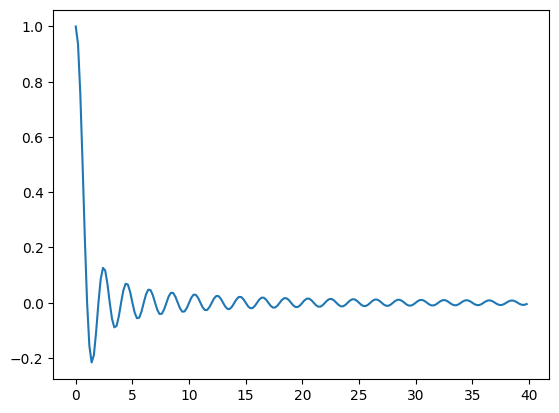

In [12]:
plt.plot(t1, signal) # Plotting the sample signal that was generated

## Generating sample microphone outputs

In this part of the notebook, the genSample function which was defined previously is used to generate a few samples, which represent the outputs that are seen by the microphones.gen

In [13]:
Nmics = 64
Nsamp = 200 # New variables to conveniently handle the self created data

# Note that the other parameters are unchanged in this part of the notebook

In [14]:
obstacle = (3, -2) # The location of the obstacle which scatters the sound

### Single Obstacle Setup

In [15]:
sample1 = genSample(Nmics, mics1, src, obstacle, SincP, Nsamp1, C, t1)

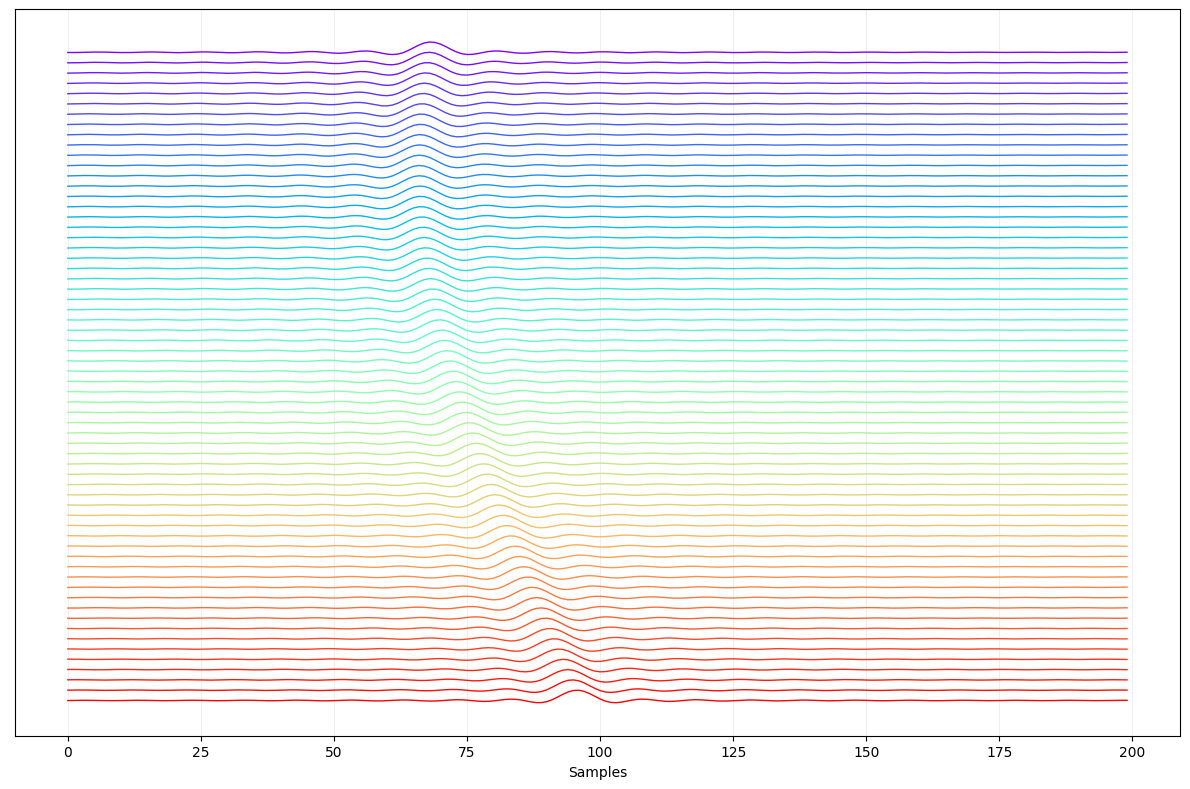

In [16]:
plot_signals(sample1) # Visualisation of the signal using the function defined above

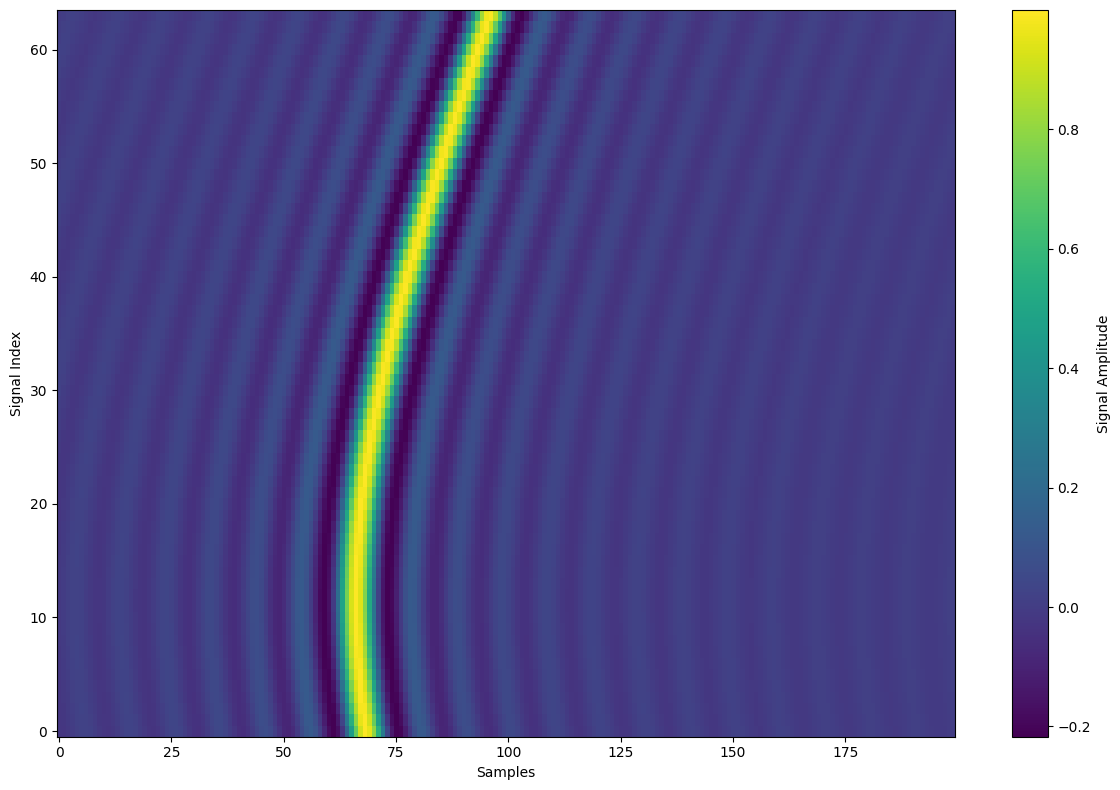

In [17]:
plot_signals_heatmap(sample1)

### Triple Obstacle Setup

For more than one obstacle, we use some other obstacle locations and add up the corresponding microphone signals. This is due to the linearity with which the powers add up in an analog microphone.

In [18]:
obs1 = (1, 0)
obs2 = (2, 2)
obs3 = (3, -1)

a = genSample(Nmics, mics1, src, obs1, SincP, Nsamp1, C, t1)
b = genSample(Nmics, mics1, src, obs2, SincP, Nsamp1, C, t1)
c = genSample(Nmics, mics1, src, obs3, SincP, Nsamp1, C, t1)

sample3 = [0] * len(a)
for i in range(len(sample3)):
    sample3[i] = a[i] + b[i] + c[i]

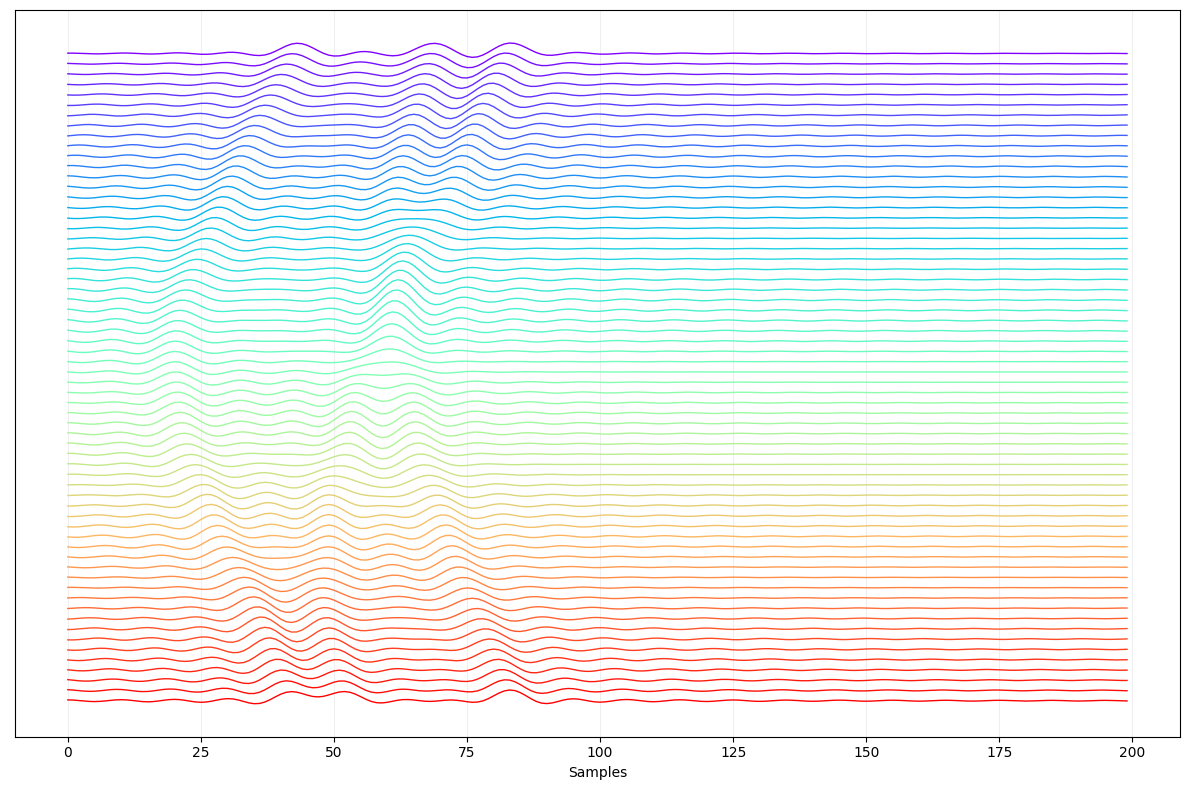

In [19]:
plot_signals(sample3)

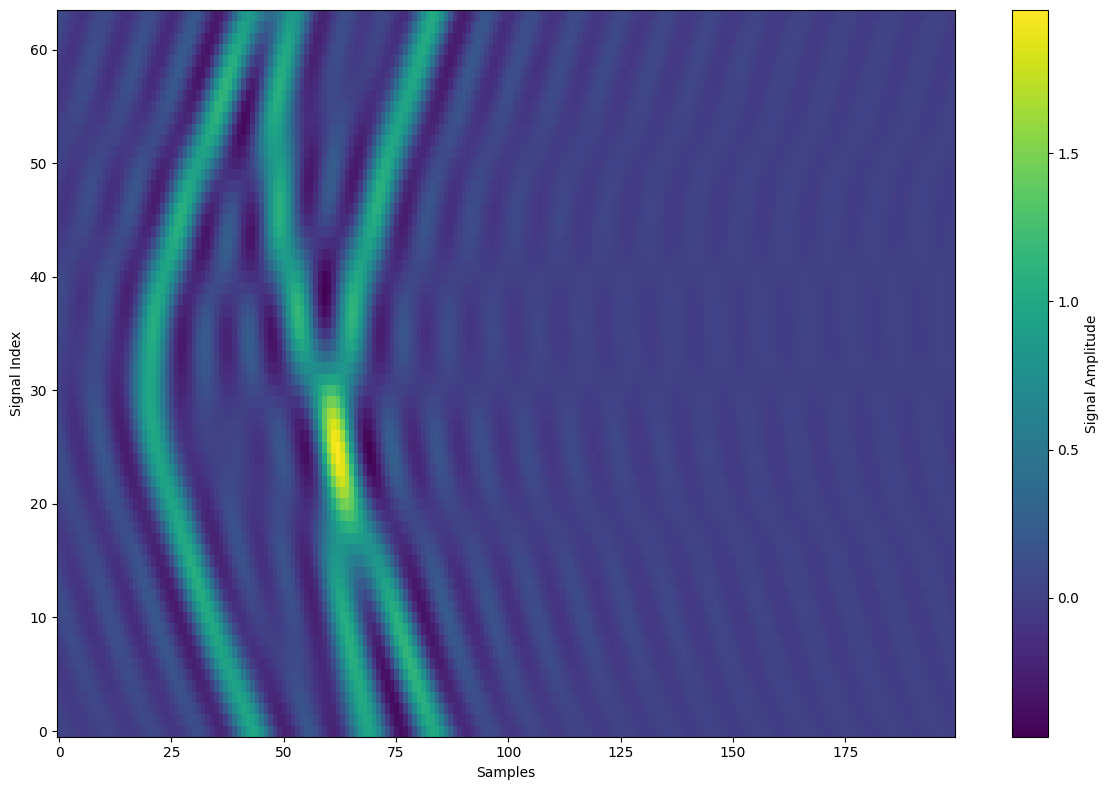

In [20]:
plot_signals_heatmap(sample3)

As can be seen in the previous two images, the obstacles each create a wavefront that is picked up by the microphone. They sometimes also add up and do not appear as two fronts, as can be seen in the centre part of the image for the 3 obstacle case.

# Analysis of the datafiles given alongside the problem sheet

The two files, which correspond to some mic - obstacle setups, which were uploaded on moodle are visualised and analysed in this part of the notebook. The DAS algorithm is implemented to make a visualisation as shown in the problemsheet

# <span style = "color:blue">Question - Upper limit for the X axis</span>

Noting that Nsamp * dist_per_samp is the maximum distance whose delay can be captured by the microphone signals, we should be able to place a tigher upper bound on the number of samples which should be considered on the x axis. Notice that in the best case, the obstacle can be in a horizontal line with the source, and the microphone closest to the source can pick up the reflected signal. In this case, the total distance travelled by the sound wave, which creates the delay has to be less than Nsamp * dist_per_samp. Now, because this is a round trip, the distance has to be half of what is calculated, and hence using Nsamp / 2 should be a bound that is better for this problem.

## DAS Algorithm Implementation

In [21]:
def DAS(mics, source_position, Nsamp, C, dist_per_samp, mic_data, dist):

    # Init the output intensity map, which will show the reconstruction of the signals
    # X axis is the search space, Y axis corresponds to mic positions
    intensity_map = np.zeros((len(mics), int(Nsamp / 2)))
    
    # For each point that will be considered on the x-axis
    for m in range(int(Nsamp / 2)):
        x = m * (dist_per_samp) # The corresponding coordinate for the point under consideration
        
        # For each microphone position
        for i, mic in enumerate(mics):
            
            y = mic[1]  # The y-coordinate of the current mic
            total = 0 # Holds the sum of the amplitudes of the delayed signals for the considered point
            
            # Calculate contribution from each mic
            for j, receiver_mic in enumerate(mics):
                
                # Calculate the delay for source to obstacle to recieved mic
                delay = dist(source_position, (x, y), receiver_mic)
                
                # Convert delay to samples and ensure it's an integer
                delay_samples = int(delay/dist_per_samp)
                
                # Bound check
                if delay_samples < len(mic_data[j]):
                    # Adding the intensity value to the total
                    total += mic_data[j][delay_samples]
            
            # Store the summed intensity for this point
            intensity_map[i][m] = total
    
    return intensity_map

In [22]:
def visualize(intensity_map):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 8))
    plt.imshow(intensity_map, origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar(label='Intensity')
    plt.xlabel('X position')
    plt.ylabel('Microphone index')
    plt.title('Obstacle Detection Intensity Map')
    plt.show()

## Analysing the first file - rx2

The plots show the visualisation of the reconstruction of the signals given using the DAS algorithm.

In [23]:
recons = DAS(mics1, src, Nsamp1, C, dist_per_samp, data1, dist)

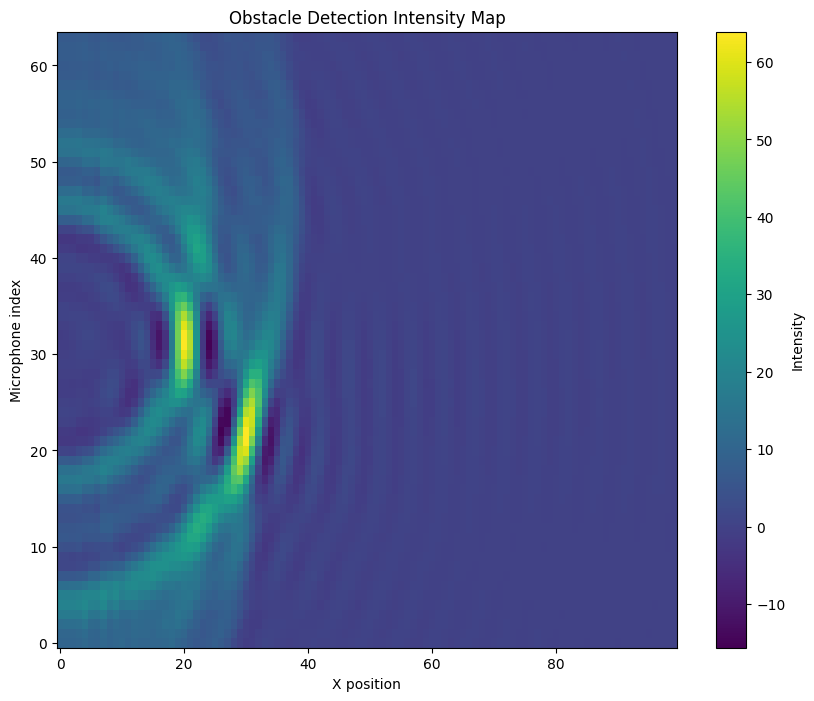

In [24]:
visualize(recons)

In the plot above, we can see two possible obstacles, located roughly at (20, 30) and (30, 20). Note that in this notebook, the microphone corresponding to the first row in the given data, is assumed to be located at the most negative coordinate and here corresponds to index 0. The uncertainty in location of this obstacles is majorly along the y axis only, with the x axis distance being fairly precise. It is also very visually clear that the location of the obstacle is seen as the intersection of multiple arcs, which is the motivation behind the Delay and Sum algorithm.

## Visualising the second file - rx3

In [25]:
recons = DAS(mics2, src, Nsamp2, C, dist_per_samp, data2, dist)

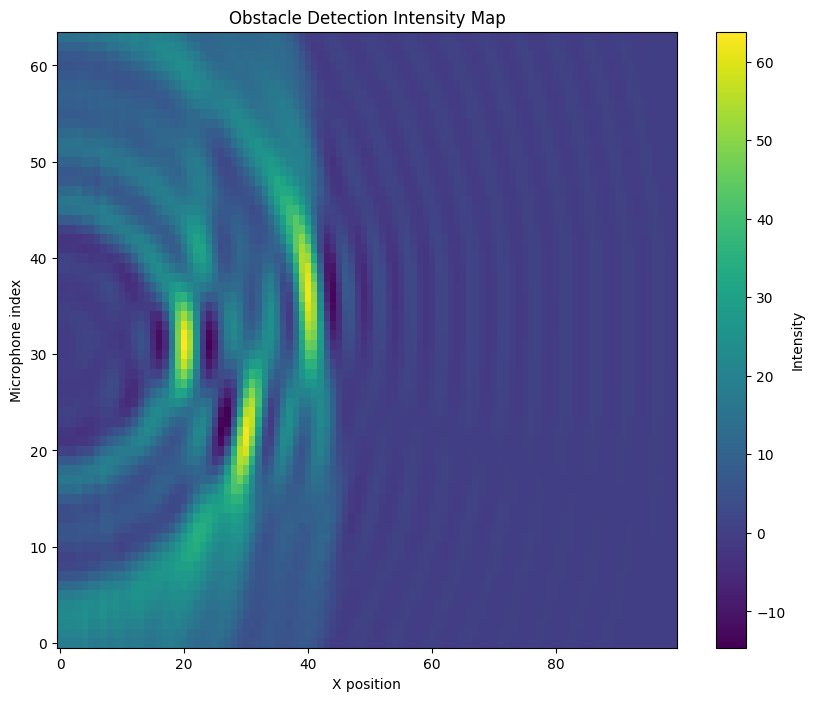

In [26]:
visualize(recons)

## Reconstruction of data generated in the notebook

This part will involve the reconstruction of the two signals that were created before(signal1, and signal3), and see if they match the parameters that were provided in the generation.

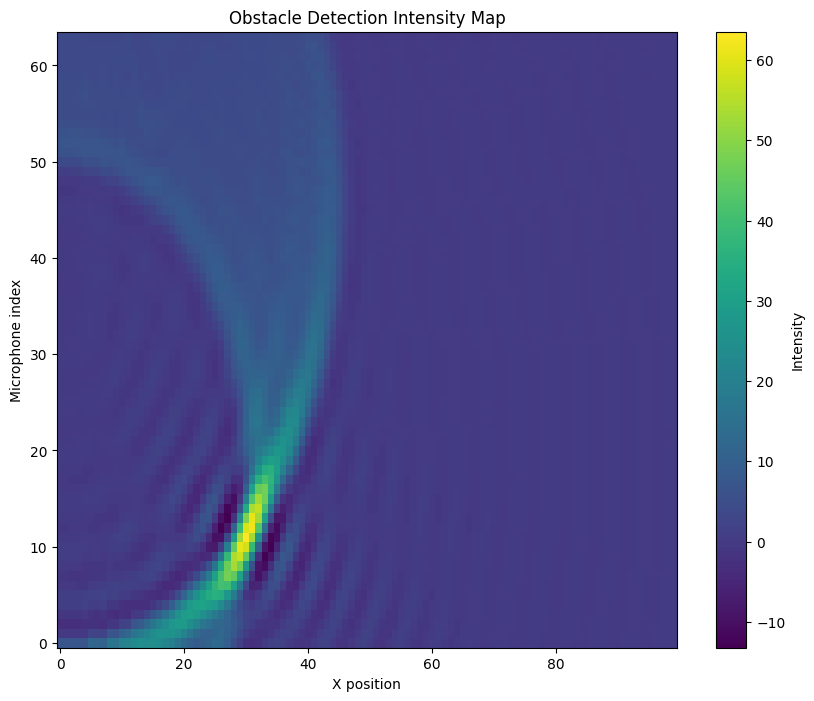

In [27]:
recons1 = DAS(mics1, src, Nsamp1, C, dist_per_samp, sample1, dist)
visualize(recons1)

Very clearly, the location of the obstacle was given as (3, -2) during the generation. The reconstruction places the obstacle in a position that is very close to the same(accounting for the microphone indices, again).

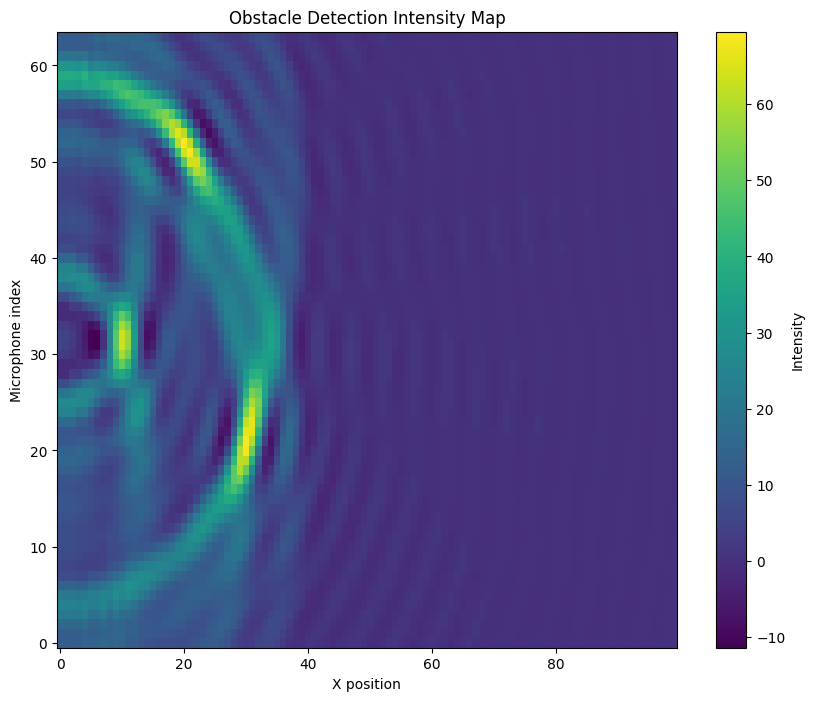

In [28]:
recons3 = DAS(mics1, src, Nsamp1, C, dist_per_samp, sample3, dist)
visualize(recons3)

The second plot also places the obstacles in the same positions that were given, proving that the algorithm works as expected

## Multiple Obstacle Setup

To make the program general, I create a new function which takes all of the parameters as inputs and returns the signal array that is the result.

In [29]:
def generalGenSample(Nmics, obstacles, SincP, Nsamp, C, pitch, dist_per_samp, src):
    
    time_per_samp = dist_per_samp / C 
    t = np.linspace(0, (Nsamp - 1) * time_per_samp, Nsamp, True) # Generates the time values for the function
    mics = micPos(Nmics, pitch)
    
    temp = genSample(Nmics, mics, src, obstacles[0], SincP, Nsamp, C, t)
    output = [0] * len(temp) # Initialise empty array to hold the output data
    
    for obstacle in obstacles:
        a = genSample(Nmics, mics, src, obstacle, SincP, Nsamp, C, t)
        for i in range(len(a)):
            output[i] += a[i]
    
    return output, mics

In [30]:
sample, _ = generalGenSample(64, [(1, 1), (2, 2), (3, -2), (1, 0), (4, -2)], 1, 400, 1, 0.1, 0.1, (0, 0))

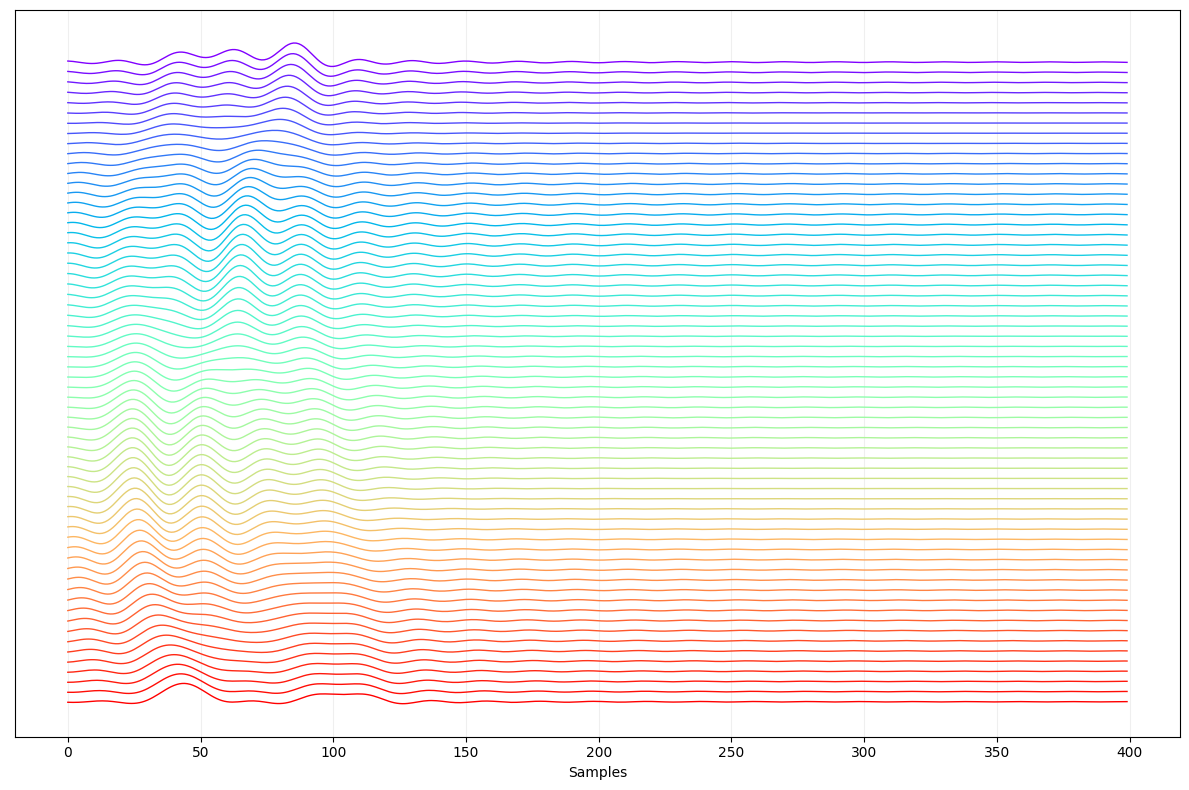

In [31]:
plot_signals(sample)

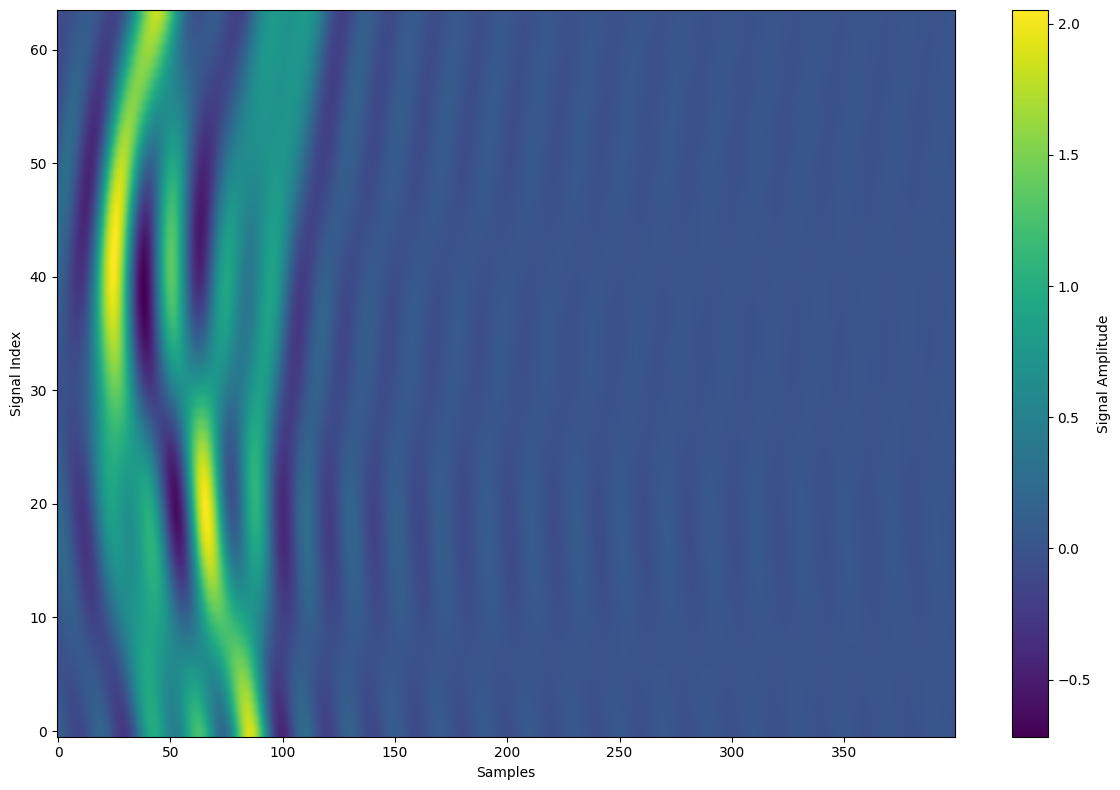

In [32]:
plot_signals_heatmap(sample)

# Varying the value of SincP and its effect on location
This part of the notebook uses the same parameters except SincP, which can give a feel for how it influences the process of location and reconstruction.

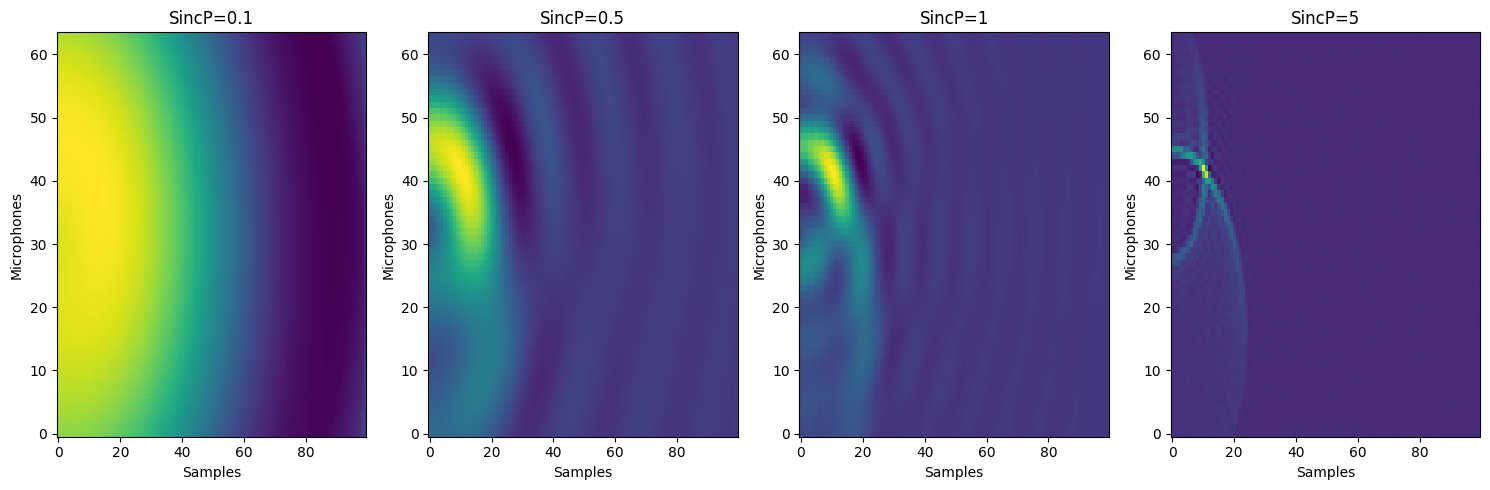

In [33]:
SincPs = [0.1, 0.5, 1, 5]
Nmics = 64
Nsamp = 200
C = 1
obs = [(1, 1)]
src = (0, 0)
dist_per_samp = 0.1

fig, axes = plt.subplots(1, len(SincPs), figsize=(15, 5))

for i, SincP in enumerate(SincPs):
    sample, mics = generalGenSample(Nmics, obs, SincP, Nsamp, C, 0.1, dist_per_samp, src)
    recons = DAS(mics, src, Nsamp, C, dist_per_samp, sample, dist)
    ax = axes[i]
    ax.imshow(recons, aspect='auto', cmap='viridis', origin='lower')
    ax.set_title(f"SincP={SincP}")
    ax.set_xlabel('Samples')
    ax.set_ylabel('Microphones')
    ax.grid(False)

plt.tight_layout()
plt.show()

As explained previously, increasing the value of SinP makes the locating pulse reach more of an impulse like form, enabling one to locate the obstacle with a far greater precision.

# <span style = "color:blue"> Question - The (x, y) coordinates corresponding to the maximum amplitude (yellow colour) is approximately (30, 22). Explain why this is the correct expected position for the given obstacle.</span>


The obstacle location given in the problem sheet is (3, -1). Noting that the pitch is 0.1 and the number of mics is 64, the microphones extend from about -3.2 to +3.2 on the y axis. The 22nd location on the given y axis corresponds to mic with index 22, which is the 10th microphone from the centre. This means its coordinate should be -1 * pitch * index from the centre = -1. Hence the y coordinate is justified. For the x coordinate, note that the parameter dist_per_sample = 0.1. This means a sample index of 30 corresponds to a distance unit of 3, which is infact the position of the obstacle that was chosen.

# <span style = "color:blue"> Question - What is the maximum obstacle x- and y- coordinate that you can use and still have an image reconstructed? </span>

The number of samples that each microphone provides limits the maximum x coordinate that can be detected. A microphone with Nsamp and dist_per_sample can tolerate a delayed distance of Nsamp * dist_per_samp, which can approximately be two times the maximum x coordinate(for the case where the obstacle is horizontal with the source, and the closest mic alone is considered. This means the max x coordinate is Nsamp * dist_per_samp / 2. The maximum y coordinate that can be detected is in similar lines to that of the x coordinate. If the obstacle is placed very close to x = 0, it can be close to Nsamp * dist_per_samp / 2 units away from the second extreme microphone in the array(noting that two mics are used to reconstruct and locate the obstacle).


# <span style = "color:blue"> Question - Variation of C </span>

To see the effect, I will generate and locate two images with the same parameters except C.

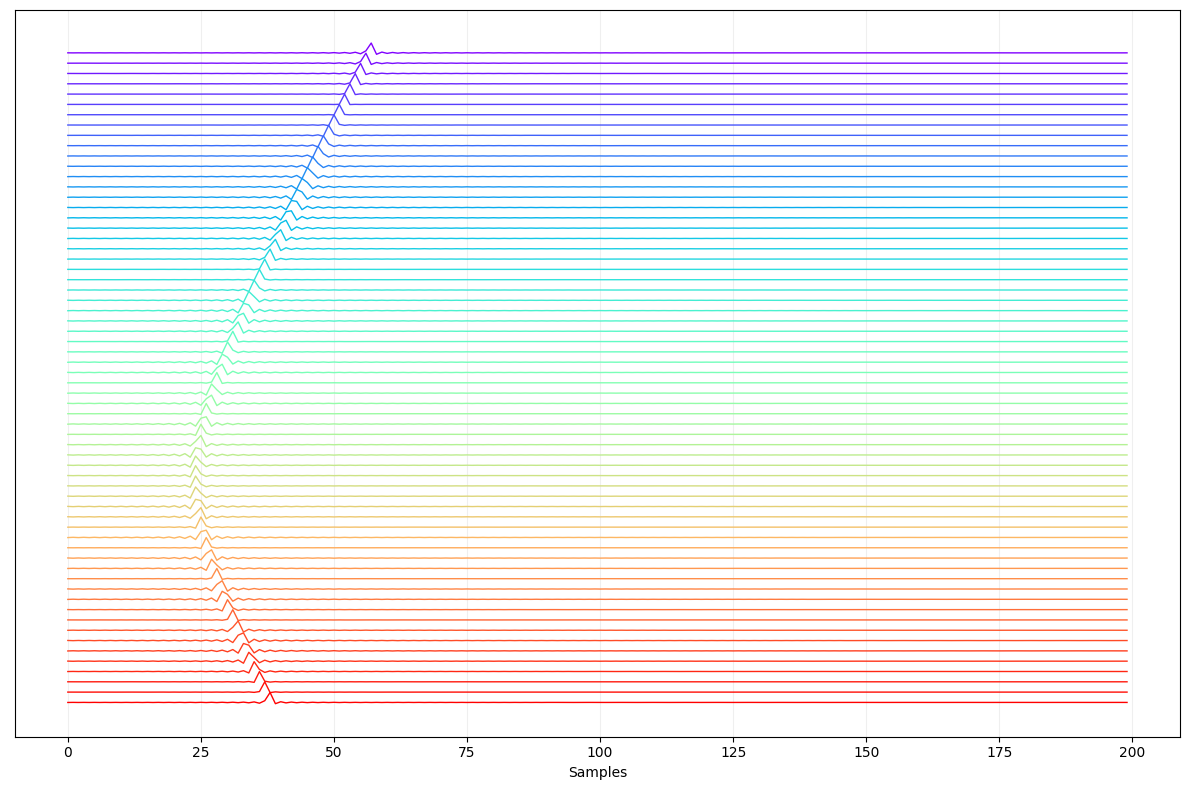

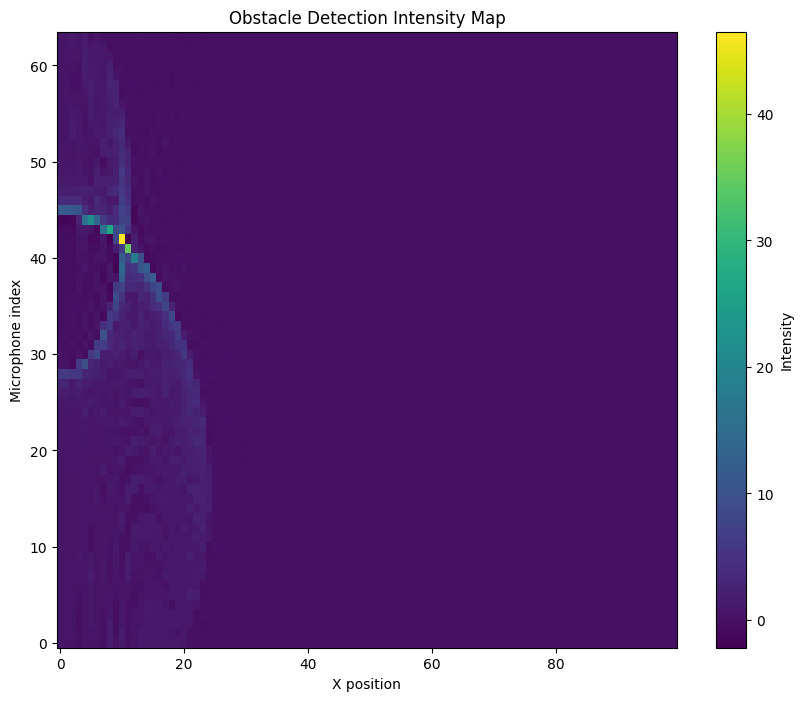

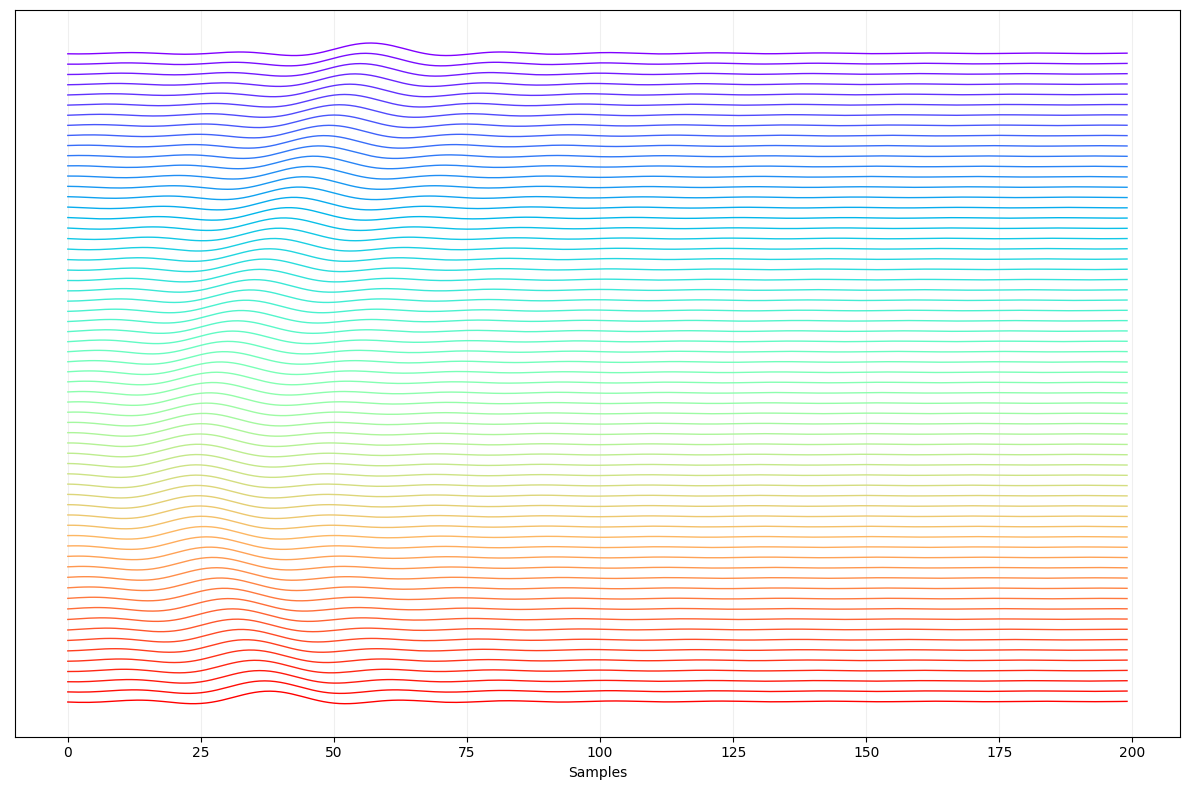

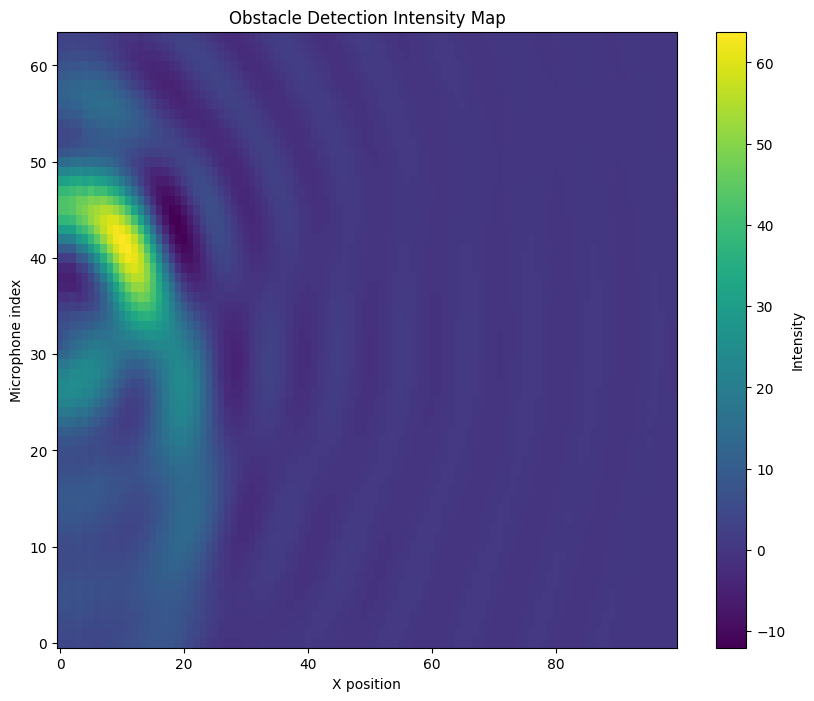

In [34]:
Nmics = 64
obs = [(1,1)]
SincP = 1
Nsamp = 200
pitch = 0.1
dist_per_samp = 0.1
src = (0, 0)

sample, mics = generalGenSample(Nmics, obs, SincP, Nsamp, 0.1, pitch, dist_per_samp, src) # Here C is 0.1
recons = DAS(mics, src, Nsamp, C, dist_per_samp, sample, dist)
plot_signals(sample)
visualize(recons)

sample, mics = generalGenSample(Nmics, obs, SincP, Nsamp, 1, pitch, dist_per_samp, src) # Here C is 1, 10 times bigger
recons = DAS(mics, src, Nsamp, C, dist_per_samp, sample, dist)
plot_signals(sample)
visualize(recons)

As can be seen, when C is decreased, the image becomes sharper. This can be explained by looking at the images of the plots of the signals accompanying them. Intuitively, when C is lower, the resolution of space that can be captured is higher - this is because the microphone samples at fixed time intervals. When the speed of sound is lower, the space resolution, which is directly related as speed * time resolution, increases and leads to a sharper locating of the obstacle.

#<span style = "color:blue"> Question - Plotting different combinations of Nsamp and Nmics </span>

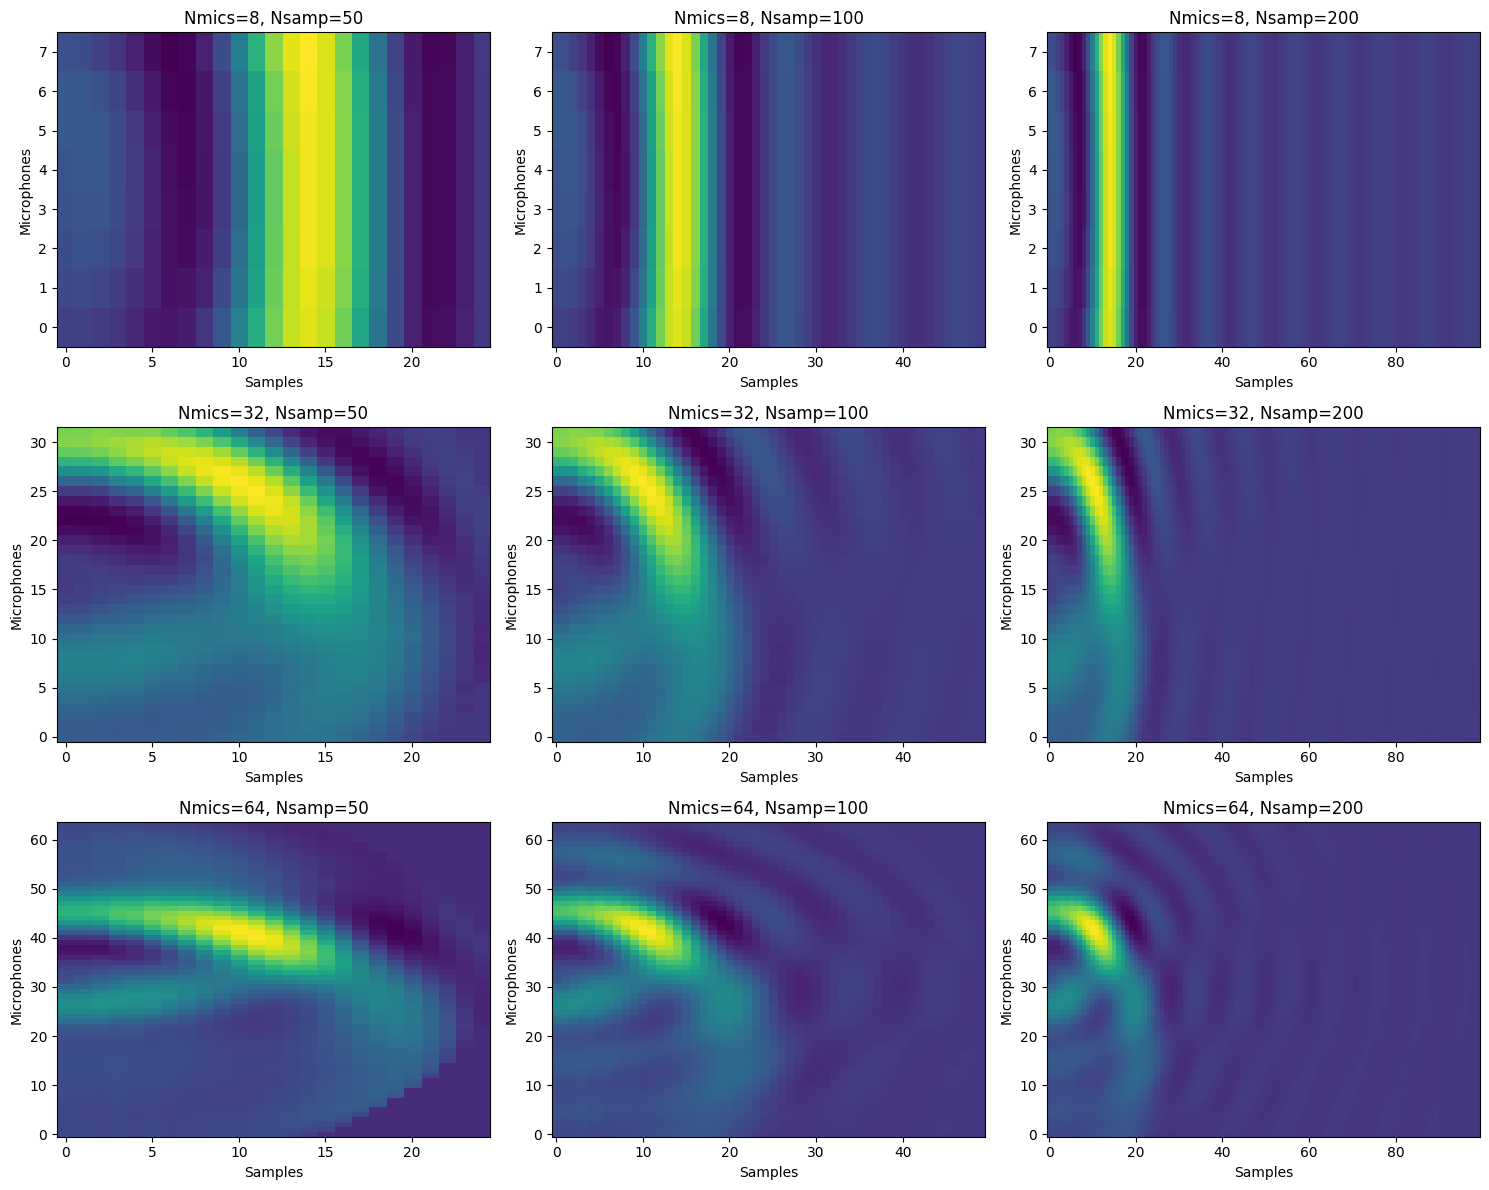

In [35]:
Nmicss = [8, 32, 64]  
Nsamps = [50, 100, 200]  
C = 1  
SincP = 1
fig, axes = plt.subplots(len(Nmicss), len(Nsamps), figsize=(15, 12))

for i, Nmics in enumerate(Nmicss):
    for j, Nsamp in enumerate(Nsamps):
        sample, mics = generalGenSample(Nmics, obs, SincP, Nsamp, C, 0.1, 0.1, src)

        recons = DAS(mics, src, Nsamp, C, dist_per_samp, sample, dist)
        ax = axes[i, j]
        ax.imshow(recons, aspect='auto', cmap='viridis', origin='lower')

        ax.set_title(f"Nmics={Nmics}, Nsamp={Nsamp}")
        ax.set_xlabel('Samples')
        ax.set_ylabel('Microphones')
        ax.grid(False)

plt.tight_layout()
plt.show()

As can be seen in the plots shown above, increasing Nmics would lead to a more precise and accurate location of the obstacle.